## Day 16
## Date : 11 June 2019

In [40]:
import pandas as pd
import seaborn as sb
from sklearn import *
import numpy as np
import statsmodels.formula.api as smf

In [5]:
cars=pd.read_csv('DataFile/cars1.csv')
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [7]:
cars.shape

(81, 5)

## Correlation:
    corr(method='pearson', min_periods=1) 
    method of pandas.core.frame.DataFrame instance
    Compute pairwise correlation of columns, excluding NA/null values.
    
    Parameters
    ----------
    method : {'pearson', 'kendall', 'spearman'} or callable
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation
        * callable: callable with input two 1d ndarrays
            and returning a float
            .. versionadded:: 0.24.0
    
    min_periods : int, optional
        Minimum number of observations required per pair of columns
        to have a valid result. Currently only available for pearson
        and spearman correlation

In [28]:
cars.corr(method='pearson')

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


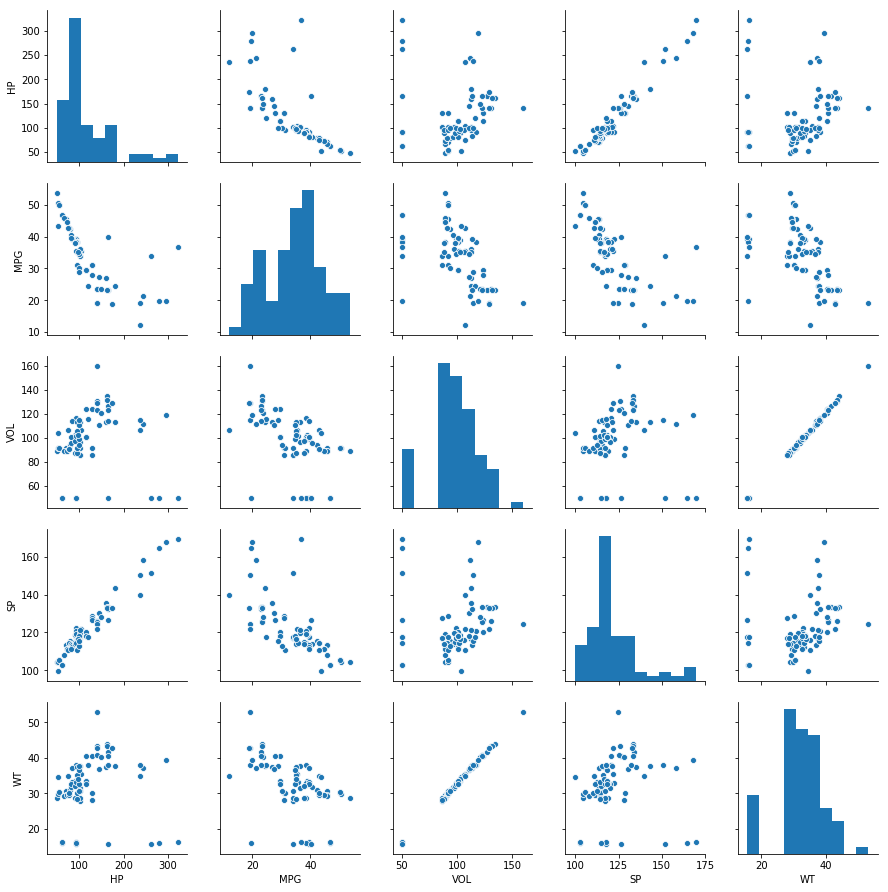

In [31]:
sb.pairplot(cars.iloc[:,:])

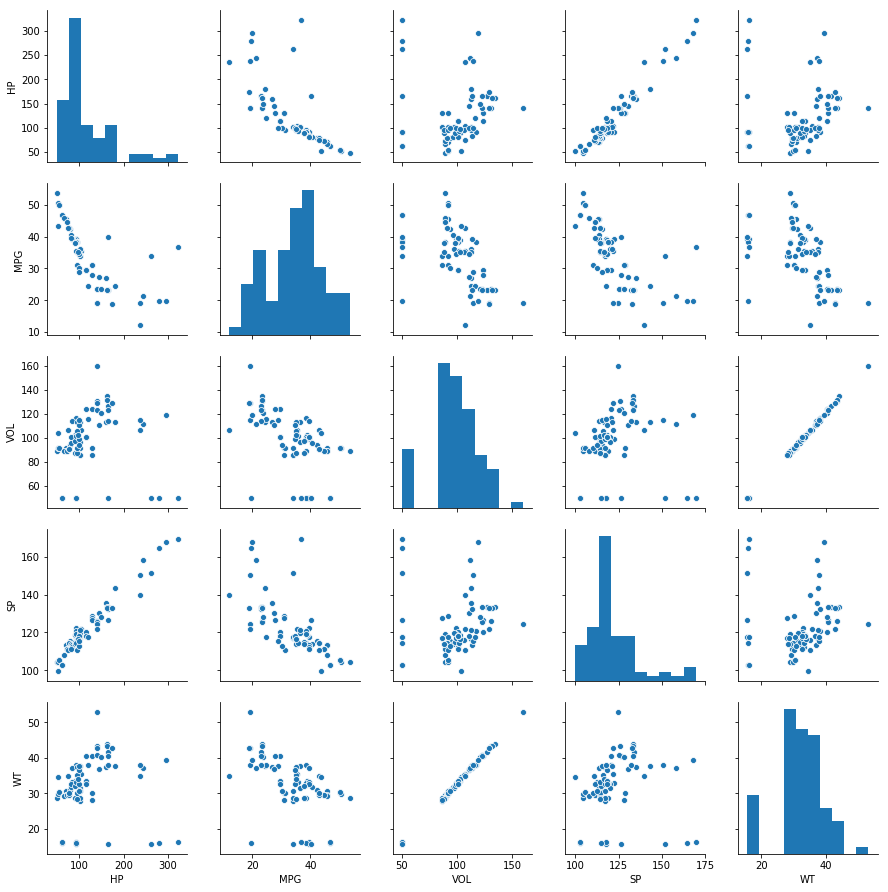

In [39]:
sb.pairplot(cars.iloc[:,:])

In [42]:
help(smf.ols)

Help on method from_formula in module statsmodels.base.model:

from_formula(formula, data, subset=None, drop_cols=None, *args, **kwargs) method of builtins.type instance
    Create a Model from a formula and dataframe.
    
    Parameters
    ----------
    formula : str or generic Formula object
        The formula specifying the model
    data : array-like
        The data for the model. See Notes.
    subset : array-like
        An array-like object of booleans, integers, or index values that
        indicate the subset of df to use in the model. Assumes df is a
        `pandas.DataFrame`
    drop_cols : array-like
        Columns to drop from the design matrix.  Cannot be used to
        drop terms involving categoricals.
    args : extra arguments
        These are passed to the model
    kwargs : extra keyword arguments
        These are passed to the model with one exception. The
        ``eval_env`` keyword is passed to patsy. It can be either a
        :class:`patsy:patsy.Eval

In [64]:
m=smf.ols('MPG ~ WT+VOL+SP+HP',data=cars).fit()
m.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [65]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           1.54e-23
Time:                        14:57:50   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
[smf.ols('MPG ~ WT',data=cars).fit().rsquared,smf.ols('MPG ~ VOL',data=cars).fit().rsquared,smf.ols('MPG ~ SP',data=cars).fit().rsquared,smf.ols('MPG ~ HP',data=cars).fit().rsquared]

[0.2774751389270127, 0.2799008651122705, 0.4721402334141217, 0.525680608628202]

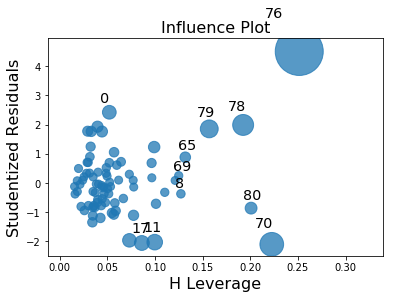

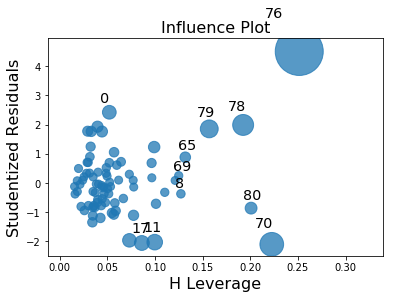

In [104]:
import statsmodels.api as sm
sm.graphics.influence_plot(m)

In [92]:
help(sm.graphics.influence_plot)

Help on function influence_plot in module statsmodels.graphics.regressionplots:

influence_plot(results, external=True, alpha=0.05, criterion='cooks', size=48, plot_alpha=0.75, ax=None, **kwargs)
    Plot of influence in regression. Plots studentized resids vs. leverage.
    
    Parameters
    ----------
    results : results instance
        A fitted model.
    external : bool
        Whether to use externally or internally studentized residuals. It is
        recommended to leave external as True.
    alpha : float
        The alpha value to identify large studentized residuals. Large means
        abs(resid_studentized) > t.ppf(1-alpha/2, dof=results.df_resid)
    criterion : str {'DFFITS', 'Cooks'}
        Which criterion to base the size of the points on. Options are
        DFFITS or Cook's D.
    size : float
        The range of `criterion` is mapped to 10**2 - size**2 in points.
    plot_alpha : float
        The `alpha` of the plotted points.
    ax : matplotlib Axes instanc

In [130]:
m_new=cars.drop(cars.index[[76,70,78,65,79,80,69,77]],axis=0,inplace=False)

In [131]:
c_new=smf.ols('MPG ~ WT+VOL+HP+SP',data=m_new).fit()


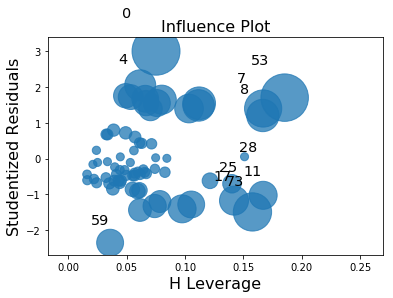

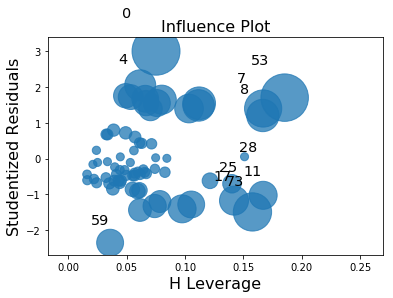

In [132]:
sm.graphics.influence_plot(c_new)

In [133]:
c_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     237.8
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           3.48e-39
Time:                        15:21:18   Log-Likelihood:                -160.67
No. Observations:                  73   AIC:                             331.3
Df Residuals:                      68   BIC:                             342.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9573      8.857      1.011      0.315      -8.716      26.631
WT             0.7643      0.880      0.869      0.388      -0.991       2.520
VOL           -0.3088      0.294     -1.051      0.297      -0.895       0.278
HP            -0.3768      0.026    -14.445      0.000      -0.429      -0.325
SP             0.6002      0.094      6.388      0.000       0.413       0.788
==============================================================================
Omnibus:                        4.252   Durbin-Watson:                   1.042
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                4.137
Skew:                           0.576   Prob(JB):                        0.126
Kurtosis:                       2.822   Cond. No.                     6.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
c_new.conf_int(0.05)

,0,1
Intercept,-8.716225,26.630745
WT,-0.991461,2.520075
VOL,-0.895325,0.277688
HP,-0.428829,-0.324729
SP,0.412716,0.787687


In [138]:
m_new['PV']=c_new.predict(m_new).to_frame()

In [139]:
m_new.head()

,HP,MPG,VOL,SP,WT,PV
0,49,53.700681,89,104.185353,28.762059,47.525432
1,55,50.013401,92,105.461264,30.466833,46.407075
2,55,50.013401,92,105.461264,30.193597,46.198239
3,70,45.696322,92,113.461264,30.632114,45.683326
4,53,50.504232,92,104.461264,29.889149,46.118904


In [145]:
rhp=smf.ols('HP~WT+SP+VOL',data=cars).fit().rsquared
rwt=smf.ols('WT~HP+SP+VOL',data=cars).fit().rsquared
rsp=smf.ols('SP~WT+HP+VOL',data=cars).fit().rsquared
rvol=smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared

In [152]:
[1/(1-rhp),1/(1-rwt),1/(1-rsp),1/(1-rvol)]

[19.926588974998563, 639.5338175572624, 20.00763878305008, 638.8060836592878]

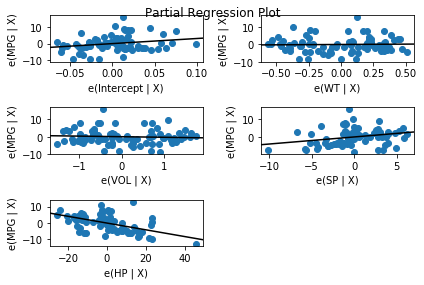

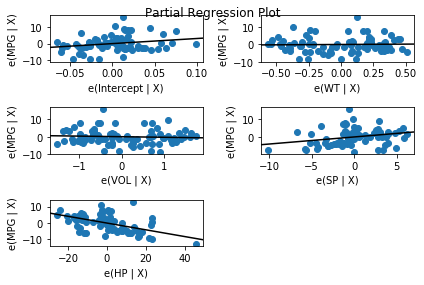

In [153]:
sm.graphics.plot_partregress_grid(m)

In [157]:
final_m1 = smf.ols('MPG ~ VOL+SP+HP', data=cars).fit()
final_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           1.56e-24
Time:                        15:39:57   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
final_m1.params

Intercept    29.923389
VOL          -0.201651
SP            0.400659
HP           -0.206705
dtype: float64

In [162]:
log_m1 = smf.ols("MPG ~ np.log(VOL) + np.log(SP) + np.log(WT)+ np.log(HP)", data=cars).fit()
log_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     196.4
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           3.05e-39
Time:                        15:41:02   Log-Likelihood:                -195.25
No. Observations:                  81   AIC:                             400.5
Df Residuals:                      76   BIC:                             412.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -151.3204     60.552     -2.499      0.015    -271.920     -30.721
np.log(VOL)    13.5270     32.950      0.411      0.683     -52.099      79.153
np.log(SP)     79.7634     10.293      7.750      0.000      59.264     100.263
np.log(WT)    -23.9481     31.801     -0.753      0.454     -87.286      39.389
np.log(HP)    -37.6318      2.711    -13.879      0.000     -43.032     -32.231
==============================================================================
Omnibus:                       23.169   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.490
Skew:                           0.407   Prob(JB):                     2.84e-34
Kurtosis:                       9.717   Cond. No.                     2.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""